<a href="https://colab.research.google.com/github/pratham18nov/Coding-Ninjas-Problem-Solving-Using-Python/blob/main/CNN_Dog_and_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the dataset**
[Kaggle Dataset](https://www.kaggle.com/datasets/tongpython/cat-and-dog) - Dog and cats


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


# **Checking the dataset**

In [ ]:
import os

path = "/kaggle/input/cat-and-dog"
print(os.listdir(path))


['test_set', 'training_set']


In [ ]:
import os

pet_train_path = "/kaggle/input/cat-and-dog/training_set/training_set"
print(os.listdir(pet_train_path))


['dogs', 'cats']


In [ ]:
import os

pet_test_path = "/kaggle/input/cat-and-dog/test_set/test_set"
print(os.listdir(pet_test_path))

['dogs', 'cats']


In [ ]:
import glob

cats = glob.glob(pet_train_path + "/cats/*")
dogs = glob.glob(pet_train_path + "/dogs/*")

print("Cats:", len(cats))
print("Dogs:", len(dogs))


Cats: 4001
Dogs: 4006


In [ ]:
import glob

cats = glob.glob(pet_test_path + "/cats/*")
dogs = glob.glob(pet_test_path + "/dogs/*")

print("Cats:", len(cats))
print("Dogs:", len(dogs))


Cats: 1012
Dogs: 1013


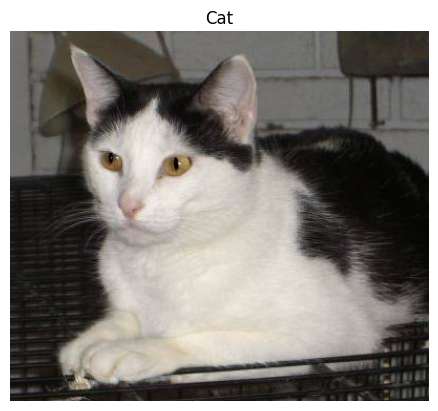

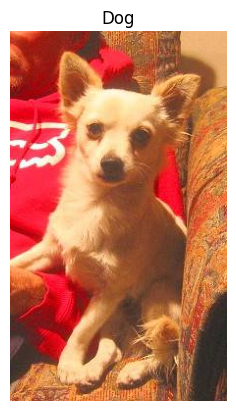

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img1 = Image.open(cats[0])
img2 = Image.open(dogs[0])

plt.imshow(img1)
plt.axis("off")
plt.title("Cat")
plt.show()

plt.imshow(img2)
plt.axis("off")
plt.title("Dog")
plt.show()

# **Importing the modules**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/kaggle/input/cat-and-dog/training_set/training_set',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/kaggle/input/cat-and-dog/test_set/test_set',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


# **Normalization**

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Creatimg the model(CNN)**

In [ ]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 0.5556 - loss: 3.3338 - val_accuracy: 0.5205 - val_loss: 2.0764
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.6307 - loss: 0.7358 - val_accuracy: 0.6604 - val_loss: 0.6554
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.6932 - loss: 0.5975 - val_accuracy: 0.5685 - val_loss: 0.6775
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7413 - loss: 0.5258 - val_accuracy: 0.6485 - val_loss: 0.6718
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.7506 - loss: 0.5601 - val_accuracy: 0.5106 - val_loss: 0.8591
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.7936 - loss: 0.4428 - val_accuracy: 0.7074 - val_loss: 0.6363
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8349 - loss: 0.3767 - val_accuracy: 0.7084 - val_loss: 0.7418
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.8529 - loss: 0.3383 -

# **Plotting the graph to check for accuracy**

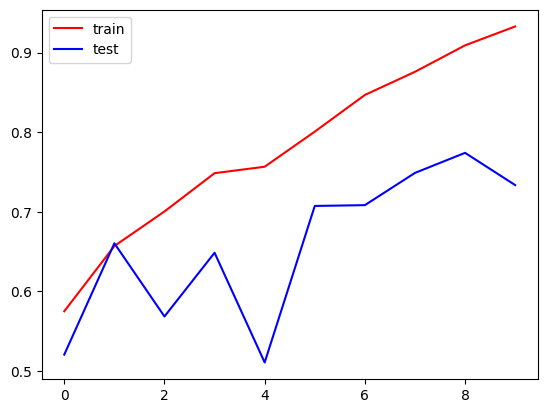

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

# It shows overfitting as there is too much gap between training and testing data
# After using batch normalization and dropout the gap descreases

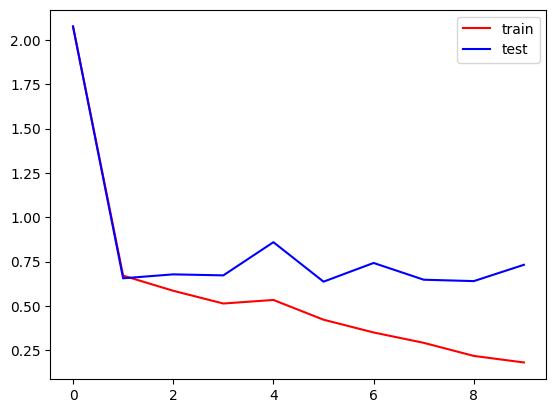

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()
# Incrasing gap tells us overfitting as it is giving incredible results for traing data but not for testing data
# The decreases way too much making our model better

# **Ways to reduce overfitting**
1.   Add more data
2.   Data Argumentation - Use of existing data to create more data
3.   L1/L2 Regularization
4.   **Dropout**
5.   **Batch Normalization**
6.   Reduce complexity



# **Testing for a new data**

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog3.jpg')

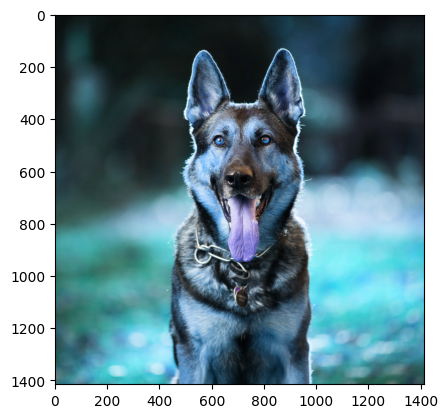

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1415, 1415, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

# **Result**
*   Dog = 0
*   Cat = 1

In [ ]:
pred = model.predict(test_input)[0][0]   # sigmoid output

p_dog = float(pred)
p_cat = 1 - p_dog

if p_dog <= 0.5:
    print(f"Prediction: Dog \nConfidence: {p_dog*100:.2f}%")
else:
    print(f"Prediction: Cat \nConfidence: {p_cat*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Dog 
Confidence: 100.00%
